In [39]:
import pandas as pd

In [40]:
oil = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\oil.csv")

In [41]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<AxesSubplot:xlabel='date'>

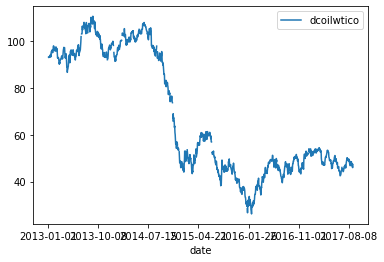

In [42]:
# Using set index
(oil
 .set_index("date")
 .plot()
)

<AxesSubplot:xlabel='date'>

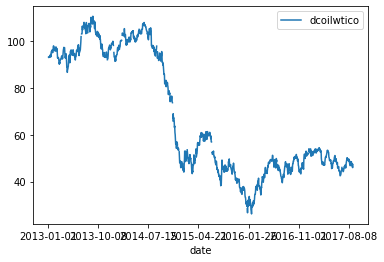

In [43]:
# Using x= argument
oil.plot(x='date')

<AxesSubplot:xlabel='date'>

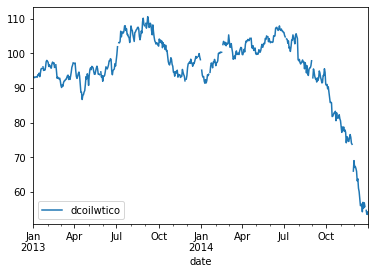

In [44]:
# Example with oil price as datetime instead of object -- more later!
(oil
 .astype({"date": "datetime64"})  # Convert date to datetime64
 .set_index("date")
 .loc["2013":"2014"]  # nice filtering here with dates
 .plot()
)

In [45]:
import seaborn as sns

sns.set_style("darkgrid")

In [46]:
oil = oil.rename(columns={"dcoilwtico": "Oil Price"})

oil

,date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<AxesSubplot:title={'center':'Oil Price 2013-2017'}, xlabel='Date', ylabel='USD Price'>

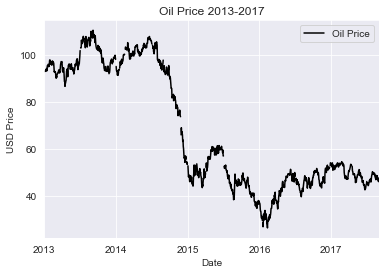

In [47]:
(oil
 .set_index(oil["date"].astype("Datetime64"))
 .plot(
    title="Oil Price 2013-2017", 
    xlabel="Date", 
    ylabel="USD Price", 
    c="Black")
)

In [49]:
transactions = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\transactions.csv")

stores_1234 = (transactions
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]  #filter to stores 1, 2, 3, 4
                .pivot_table(index="date", columns="store_nbr") # Createa pivot table
                .droplevel(0, axis=1))  # drop outer layer of column axis

In [50]:
stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

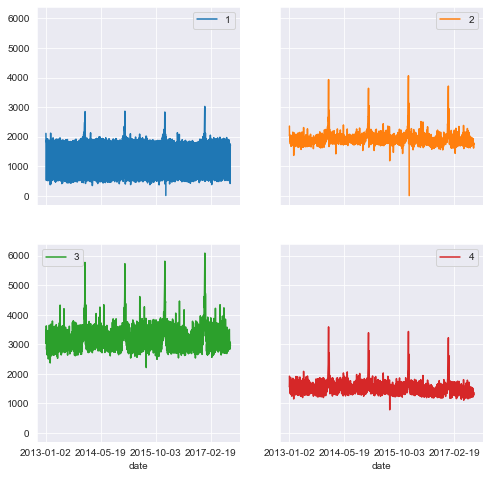

In [51]:
stores_1234.plot(subplots=True,   # create subplots
                 layout=(2, 2),   # in a 2x2 layour
                 figsize=(8, 8),  # increase figure size
                 sharey=True)     # share y-axis among plots for better comparison

In [52]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<AxesSubplot:xlabel='store_nbr'>

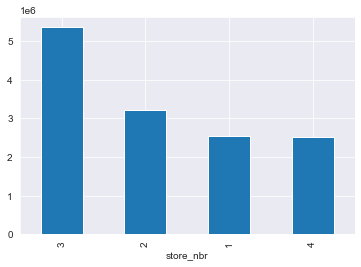

In [53]:
# create bar chart of total sales for each series, sorted high to low

stores_1234.sum().sort_values(ascending=False).plot.bar()

In [54]:
# Calculate monthly sum for each store groupbed by month

# stores_1234.index.month will allow you to groupby the month!

stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


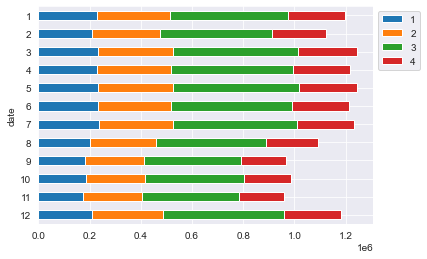

In [55]:
(stores_1234_monthly
 .sort_index(ascending=False)    # sort in ascending order so lowest comes first (technically this code is redundant)
 .plot.barh(stacked=True)        # created stacked bar chart (will stack by column names)
 .legend(bbox_to_anchor=(1, 1))  # Move legend to better location
)

In [56]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Figure size 1440x1152 with 0 Axes>

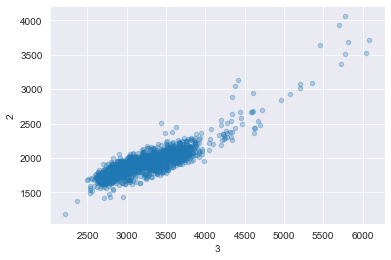

In [62]:
import matplotlib.pyplot as plt

# Increase the figure size and add transparency to the scatter plot
plt.figure(figsize=(20, 16))  # Set the figure size (width, height)
stores_1234.plot.scatter(x=3, y=2, alpha=0.3)  # alpha controls transparency; 0.5 means 50% transparent

# Show the plot
plt.show()


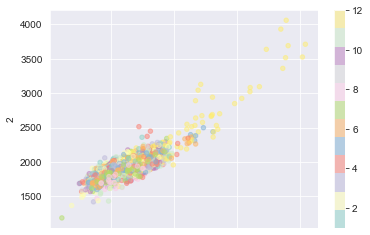

In [65]:
stores_1234.plot.scatter(x=3, 
                         y=2, 
                         c=stores_1234.index.month,  # color by month
                         colormap="Set3",
                         alpha=0.5);           # specify colormap "Set2", choose your own!